In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

最近邻插值

In [ ]:
def nearest_interpolation(img,H,W):
    height,width,channels = img.shape
    image_new = np.zeros((H,W,channels),np.uint8)
    sh=H/height
    sw=W/width
    for c in range(channels):
        for i in range(H):
            for j in range(W):
                x=int(i/sh + 0.5)
                y=int(j/sw + 0.5)
                image_new[i,j,c]=img[x,y,c]
    return image_new


img=cv2.imread("lenna.png")
image_new=nearest_interpolation(img,1000,1000)
# print(image_new.shape)
cv2.imshow("nearest_interpolation",image_new)
cv2.imshow("image",img)


cv2.waitKey(0)

双线性插值

In [10]:
def bilinear_interpolation(img,out_dim):
    src_h, src_w, channel = img.shape
    dst_h, dst_w = out_dim[0], out_dim[1]

    if src_h == dst_h and src_w == dst_w:
        return img.copy()
    
    dst_img = np.zeros((dst_h,dst_w,channel),dtype=np.uint8)
    scale_x, scale_y = float(src_w) / dst_w, float(src_h) / dst_h
    for i in range(channel):
        for dst_x in range(dst_h):    
            for dst_y in range(dst_w):
            
                # 中心归一化
                src_x = (dst_x + 0.5) * scale_x-0.5
                src_y = (dst_y + 0.5) * scale_y-0.5
 
                src_x0 = int(np.floor(src_x))
                src_x1 = min(src_x0 + 1 ,src_h - 1)
                src_y0 = int(np.floor(src_y))
                src_y1 = min(src_y0 + 1, src_w - 1)
 
                temp0 = (src_x1 - src_x) * img[src_x0,src_y0,i] + (src_x - src_x0) * img[src_x1,src_y0,i]
                temp1 = (src_x1 - src_x) * img[src_x0,src_y1,i] + (src_x - src_x0) * img[src_x1,src_y1,i]
                dst_img[dst_x,dst_y,i] = int((src_y1 - src_y) * temp0 + (src_y - src_y0) * temp1)
 
    return dst_img


img = cv2.imread('lenna.png')
dst = bilinear_interpolation(img,(700,700))
cv2.imshow('image',img)
cv2.imshow('bilinear_interpolation',dst)

cv2.waitKey()

-1

直方图

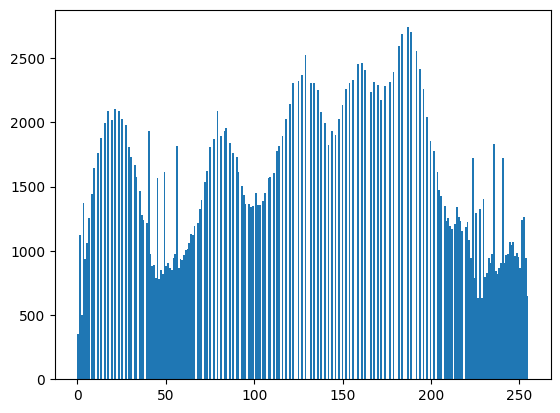

-1

In [3]:
img = cv2.imread("lenna.png", 1)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

dst = cv2.equalizeHist(gray)
hist = cv2.calcHist([dst],[0],None,[256],[0,256])

plt.figure()
plt.hist(dst.ravel(), 256)
plt.show()

cv2.imshow("Histogram Equalization", np.hstack([gray, dst]))
cv2.waitKey(0)

测试 边缘特征

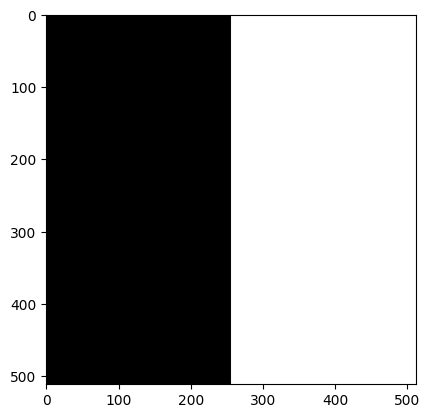

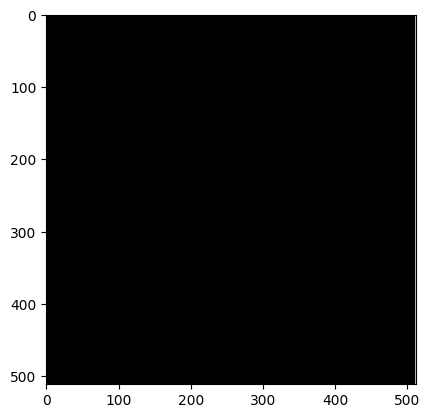

In [13]:
img=np.zeros((512,512),dtype=np.uint8)
H,W=img.shape
for i in range(H):
    for j in range(W):
        if j>=W//2:
            img[i,j]=255
# img = cv2.imread("lenna.png", 1)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# print(img)
plt.figure(1)
plt.imshow(img.astype(np.uint8), cmap='gray')
# plt.axis('off')

sobel=[[1,0,-1],[1,0,-1],[1,0,-1]]
img_pad=np.pad(img,((1,1),(1,1)),'constant')
img_new=np.zeros((H,W))
for i in range(H):
    for j in range(W):
        img_new[i,j]=np.sum(img_pad[i:i+3,j:j+3]*sobel)
# print(img_new)
plt.figure(2)
plt.imshow(img_new.astype(np.uint8), cmap='gray')
# plt.axis('off')

plt.show()
        